In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, models, layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("shubhamgoel27/dermnet")

# print("Path to dataset files:", path)

In [3]:
classes=os.listdir('Dataset/train')
dic={}
for i in classes:
    dic[i]= len(os.listdir(os.path.join('Dataset/train',i)))
for key,value in dic.items():
    print(key,":",value,"\n")

Herpes HPV and other STDs Photos : 405 

Seborrheic Keratoses and other Benign Tumors : 1371 

Bullous Disease Photos : 448 

Lupus and other Connective Tissue diseases : 420 

Exanthems and Drug Eruptions : 404 

Acne and Rosacea Photos : 840 

Systemic Disease : 606 

Melanoma Skin Cancer Nevi and Moles : 463 

Eczema Photos : 1235 

Urticaria Hives : 212 

Vascular Tumors : 482 

Light Diseases and Disorders of Pigmentation : 568 

Vasculitis Photos : 416 

Scabies Lyme Disease and other Infestations and Bites : 431 

Cellulitis Impetigo and other Bacterial Infections : 288 

Nail Fungus and other Nail Disease : 1040 

Hair Loss Photos Alopecia and other Hair Diseases : 239 

Atopic Dermatitis Photos : 489 

Tinea Ringworm Candidiasis and other Fungal Infections : 1300 

Psoriasis pictures Lichen Planus and related diseases : 1405 

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 1149 

Poison Ivy Photos and other Contact Dermatitis : 260 

Warts Molluscum and o

### Bar Chart

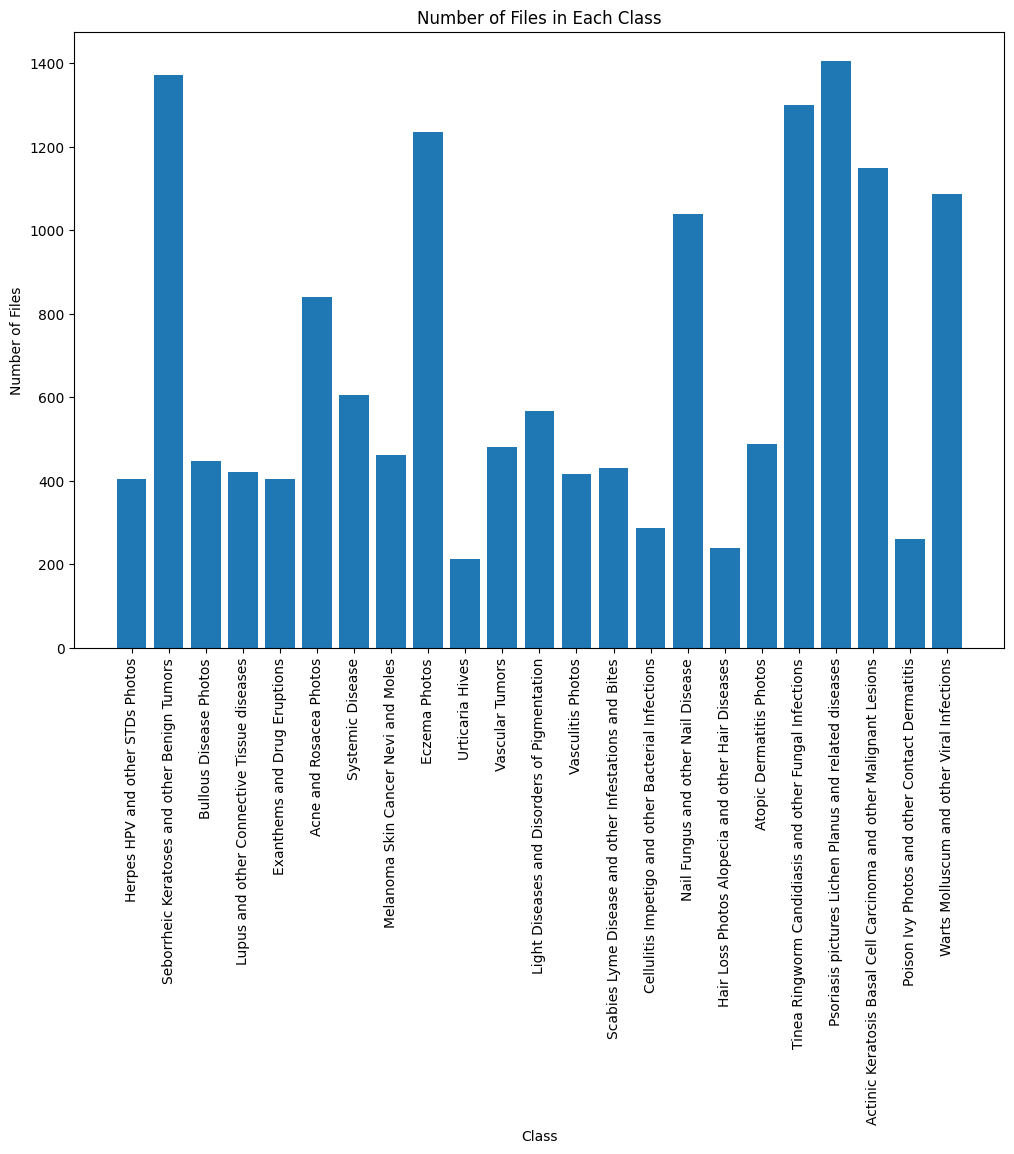

In [4]:
plt.figure(figsize=(12, 8))
plt.bar(dic.keys(), dic.values())
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Class')
plt.show()

### Pie Chart

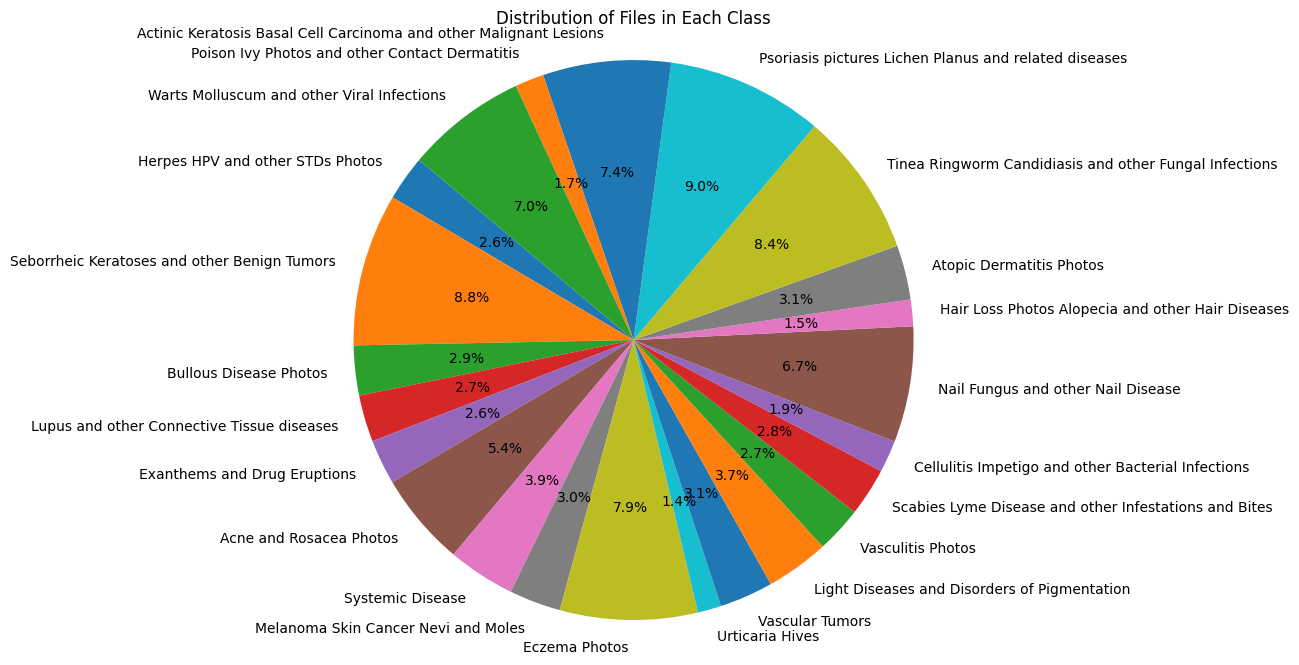

In [5]:
plt.figure(figsize=(12, 8))
plt.pie(dic.values(), 
        labels=dic.keys(), 
        autopct='%1.1f%%', 
        startangle=140, 
        textprops={'fontsize': 10}) 

plt.axis('equal') 
plt.title('Distribution of Files in Each Class')
plt.show()

### Prepare Train data and Test Data

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'Dataset/train',
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'Dataset/test',
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
)

Found 15557 files belonging to 23 classes.


I0000 00:00:1750835879.445074    4129 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 4002 files belonging to 23 classes.


In [24]:
for images, labels in train_ds.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    print("Labels:", labels.numpy())

Image shape: (32, 256, 256, 3)
Label shape: (32,)
Labels: [ 5  0 18  0  0  4  0 22 18 13 18 16  3 21  0 11 20  2 14  0 14 10  0 22
 14 22 12 12 18 13 13  0]


In [8]:
len(train_ds)

487

In [9]:
len(validation_ds)

126

In [22]:
class_names = train_ds.class_names
len(class_names)
class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [13]:
import textwrap


2025-06-25 07:21:28.012624: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


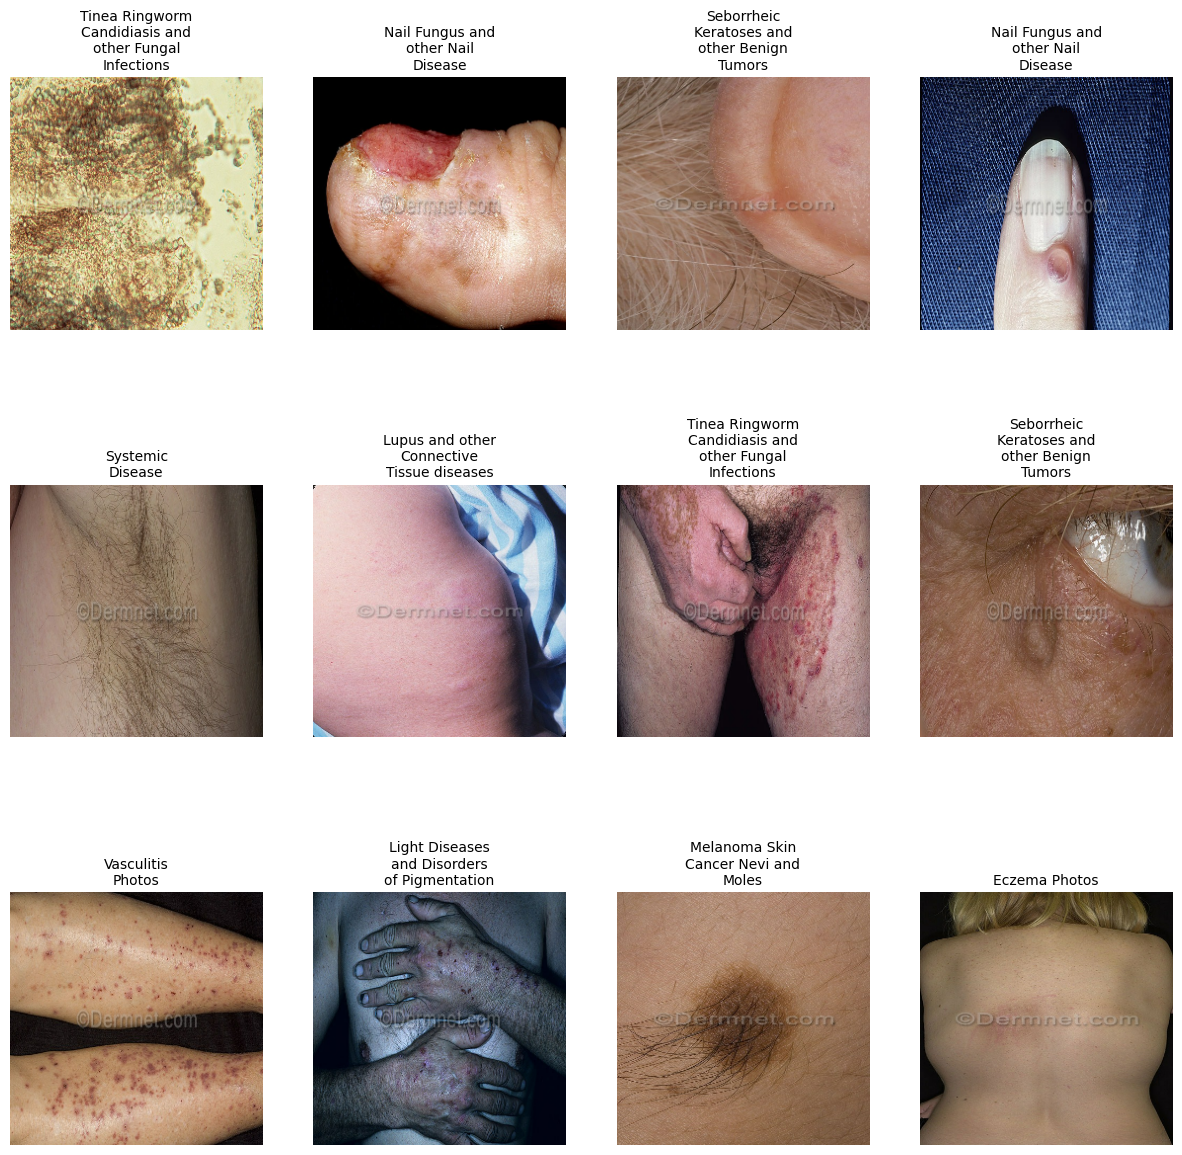

In [15]:
plt.figure(figsize=(15,15))
for image_batch, labels_batch in train_ds.take(1): # Gives one Batch(32 images)
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    
    title = textwrap.fill(class_names[labels_batch[i]], width=15)
    plt.title(title, fontsize=10)

    plt.axis('off')



In [17]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [18]:

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [74]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # ✅ without None
n_classes = 23

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(10, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(20, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(40, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(80, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(80, activation='relu'),
    layers.Dropout(0.1),

    layers.Dense(40, activation='relu'),
    layers.Dropout(0.1),

    layers.Dense(20, activation='relu'),
    layers.Dropout(0.1),

    layers.Dense(10, activation='relu'),
    layers.Dropout(0.1),

    layers.Dense(n_classes, activation='softmax'),
])


/home/piyush/SkinDisClass/SDCvenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (32, 254, 254, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (32, 254, 254, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (32, 127, 127, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (32, 125, 125, 20)     │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (32, 125, 125, 20)     │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (32, 62, 62, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (32, 60, 60, 40)       │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (32, 60, 60, 40)       │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (32, 30, 30, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (32, 28, 28, 80)       │        28,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (32, 28, 28, 80)       │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (32, 14, 14, 80)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (32, 15680)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (32, 80)               │     1,254,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (32, 80)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (32, 40)               │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (32, 40)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (32, 20)               │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (32, 20)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (32, 10)               │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (32, 10)               │             

 Total params: 1,297,823 (4.95 MB)

 Trainable params: 1,297,523 (4.95 MB)

 Non-trainable params: 300 (1.17 KB)

In [76]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [77]:
from sklearn.utils import class_weight
import numpy as np

# Get all class indices from your training dataset
class_labels = []
for _, labels in train_ds.unbatch():
    class_labels.append(labels.numpy())

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

# Convert to dict for model.fit
class_weights = dict(enumerate(class_weights))

2025-06-25 11:01:23.017680: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [78]:
history = model.fit(train_ds, epochs=50, validation_data=validation_ds, class_weight=class_weights)

Epoch 1/50


487/487 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.0566 - loss: 3.1755 - val_accuracy: 0.0680 - val_loss: 3.1362
Epoch 2/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 49s 100ms/step - accuracy: 0.0703 - loss: 3.1405 - val_accuracy: 0.0845 - val_loss: 3.1208
Epoch 3/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.0804 - loss: 3.1228 - val_accuracy: 0.0785 - val_loss: 3.1054
Epoch 4/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.0836 - loss: 3.1127 - val_accuracy: 0.0862 - val_loss: 3.0931
Epoch 5/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.0898 - loss: 3.1036 - val_accuracy: 0.1067 - val_loss: 3.0734
Epoch 6/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - accuracy: 0.0970 - loss: 3.0833 - val_accuracy: 0.1177 - val_loss: 3.0601
Epoch 7/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 49s 100ms/step - accuracy: 0.1071 - loss: 3.0775 - val_accuracy: 0.1034 - val_loss: 3.0396
Epoch 8/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 51s 104ms/step - accuracy: 0.1103 - loss: 3.0566 - val_a

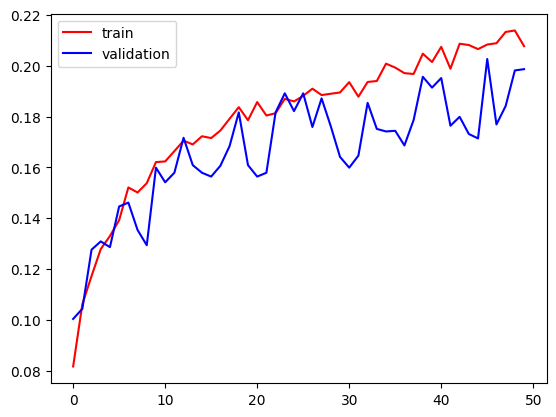

In [45]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

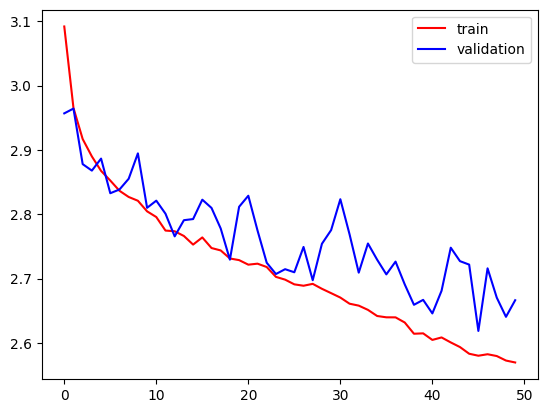

In [46]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# STEP 8: Save the model

In [47]:
model.save("model.h5")


# Predict

In [49]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


In [51]:
model = load_model("model.h5")

# Replace with your 23 class labels
class_names = class_names  # Fill this with actual class names


In [52]:
def predict_image(image_path):
    # Read image using OpenCV
    test_img = cv2.imread(image_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Resize to match model input
    test_img = cv2.resize(test_img, (256, 256))

    # Normalize pixel values to [0, 1]
    test_img = test_img / 255.0

    # Reshape to (1, 256, 256, 3) → batch of 1
    test_input = test_img.reshape((1, 256, 256, 3))

    # Predict
    prediction = model.predict(test_input)[0]

    # Get class with highest probability
    predicted_index = np.argmax(prediction)
    confidence = prediction[predicted_index]

    # Map index to class name
    predicted_class = class_names[predicted_index]

    return predicted_class, confidence


In [58]:
predict_image('KeratosisIMG006-GP3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


('Psoriasis pictures Lichen Planus and related diseases',
 np.float32(0.11025676))

In [63]:
test_img = cv2.imread("Dataset/train/Tinea Ringworm Candidiasis and other Fungal Infections/03ContactDerm040127.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Resize to match model input
test_img = cv2.resize(test_img, (256, 256))

# Normalize pixel values to [0, 1]
test_img = test_img / 255.0

# Reshape to (1, 256, 256, 3) → batch of 1
test_input = test_img.reshape((1, 256, 256, 3))

# Predict
prediction = model.predict(test_input)[0]

# Get class with highest probability
print(prediction)
predicted_index = np.argmax(prediction)
confidence = prediction[predicted_index]

# Map index to class name
predicted_class = class_names[predicted_index]

print(predicted_class, confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[0.01975647 0.07661545 0.03200596 0.03453564 0.02250401 0.0470884
 0.0282908  0.03569168 0.03491456 0.05226473 0.03832148 0.0242889
 0.0266199  0.01501416 0.11015036 0.04687815 0.09042269 0.07273737
 0.09714893 0.00708948 0.02829271 0.0157013  0.04366691]
Psoriasis pictures Lichen Planus and related diseases 0.11015036
